In [6]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def apply_adaptive_histogram_equalization(image, clip_limit = 1.5, tile_size = (8, 8)):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blur_img = cv2.GaussianBlur(gray_image, (15, 15), 0)
    #blur_img = cv2.medianBlur(gray_image, 15)

    clahe = cv2.createCLAHE(clipLimit = clip_limit, 
                            tileGridSize = tile_size)
    equalized_image = clahe.apply(blur_img)
    
    return equalized_image

In [8]:
def crop_coins_from_background(img_file_name, kernel_size = 3):
    image = cv2.imread(img_file_name)
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)equalized_img
    #blur_img = cv2.GaussianBlur(gray_image, (15, 15), 0)
    equalized_img = apply_adaptive_histogram_equalization(image, tile_size = (3, 3))

    # Compute gradient using Sobel operators
    gradient_x = cv2.Sobel(equalized_img, cv2.CV_64F, 1, 0, ksize = kernel_size)
    gradient_y = cv2.Sobel(equalized_img, cv2.CV_64F, 0, 1, ksize = kernel_size)

    # Compute gradient magnitude and orientation
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    #magnitude_threshold = 50
    #median_magnitude = np.median(gradient_magnitude)
    #percentile_75 = np.percentile(gradient_magnitude, 75)
    #edges = ((gradient_magnitude < percentile_75) & (gradient_magnitude > median_magnitude)).astype(np.uint8) * 255

    percentage_threshold = 0.1
    absolute_threshold = percentage_threshold * np.max(gradient_magnitude)
    edges = (gradient_magnitude > absolute_threshold).astype(np.uint8) * 255

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cropped_objects = []
    min_area_threshold = 1000
    len_contours = len(contours)

    for i, contour in enumerate(contours):
        mask = np.zeros_like(edges)
        cv2.drawContours(mask, [contour], 0, (255), thickness = cv2.FILLED)

        object_cropped = cv2.bitwise_and(image, image, mask = mask)
        x, y, w, h = cv2.boundingRect(contour)

        if w * h > min_area_threshold:
            object_cropped = object_cropped[y: y + h, x: x + w]
            print(f"Cropped object number {i + 1} out of {len(contours)}")
            cropped_objects.append(object_cropped)
    return cropped_objects

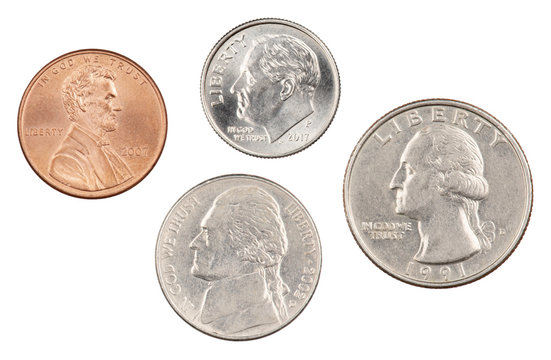

In [9]:
Image.open('./test/test_img5.jpg')

Cropped object number 1 out of 4
Cropped object number 2 out of 4
Cropped object number 3 out of 4
Cropped object number 4 out of 4


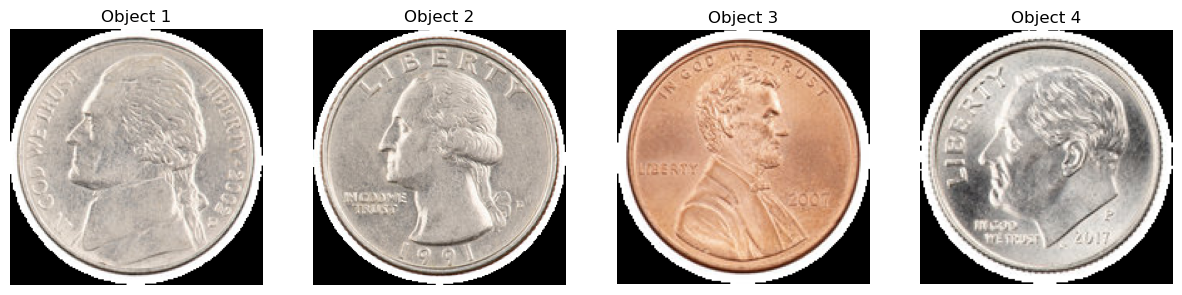

In [10]:
cropped_objects = crop_coins_from_background('./test/test_img5.jpg')
fig, axs = plt.subplots(1, len(cropped_objects), figsize = (15, 5))

for i, (cropped_obj, ax) in enumerate(zip(cropped_objects, axs)):
    ax.imshow(cv2.cvtColor(cropped_obj, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Object {i + 1}')
    ax.axis('off')
plt.show()

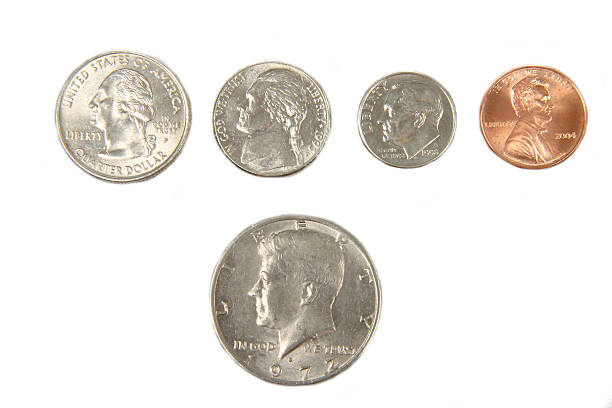

In [11]:
Image.open(('./test/test_img16.jpg'))

Cropped object number 1 out of 5
Cropped object number 2 out of 5
Cropped object number 3 out of 5
Cropped object number 4 out of 5
Cropped object number 5 out of 5


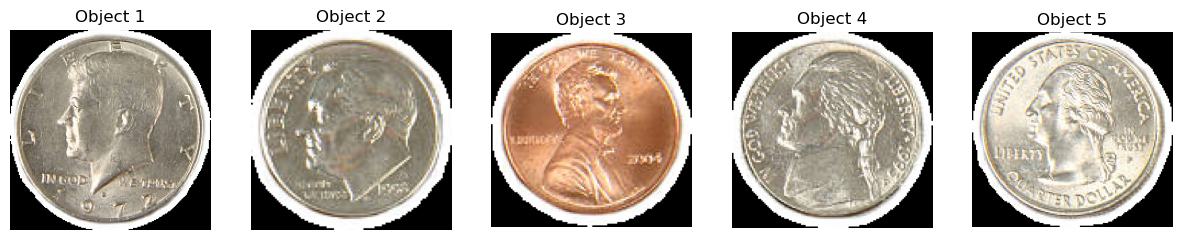

In [12]:
cropped_objects = crop_coins_from_background('./test/test_img16.jpg')
fig, axs = plt.subplots(1, len(cropped_objects), figsize = (15, 5))

for i, (cropped_obj, ax) in enumerate(zip(cropped_objects, axs)):
    ax.imshow(cv2.cvtColor(cropped_obj, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Object {i + 1}')
    ax.axis('off')
plt.show()

In [ ]:
cropped_objects = crop_coins_from_background('./test/test_img16.jpg')

Cropped object number 1 out of 15
Cropped object number 3 out of 15
Cropped object number 4 out of 15
Cropped object number 7 out of 15
Cropped object number 8 out of 15
Cropped object number 9 out of 15
Cropped object number 10 out of 15
Cropped object number 11 out of 15
Cropped object number 12 out of 15
Cropped object number 13 out of 15
Cropped object number 14 out of 15
Cropped object number 15 out of 15


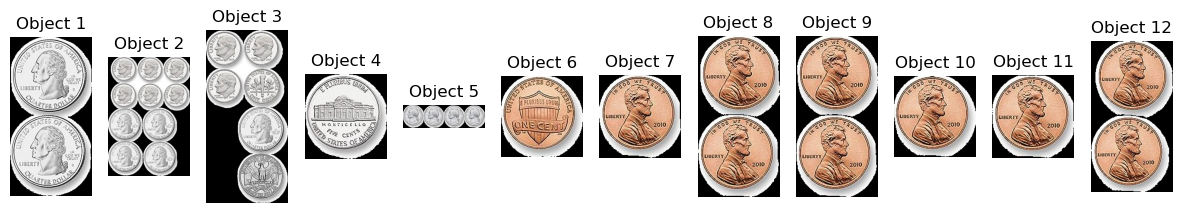

In [144]:
cropped_objects = crop_coins_from_background('./test/test_img21.jpg')
fig, axs = plt.subplots(1, len(cropped_objects), figsize = (15, 5))
for i, (cropped_obj, ax) in enumerate(zip(cropped_objects, axs)):
    ax.imshow(cv2.cvtColor(cropped_obj, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Object {i + 1}')
    ax.axis('off')
plt.show()

# Single coins

In [145]:
# Image directories
nickels_cropped_dir = "./nickels_cropped/"
nickels_cropped_files = glob(f"{nickels_cropped_dir}/*")

quarters_cropped_dir = "./quarters_cropped/"
quarters_cropped_files = glob(f"{quarters_cropped_dir}/*")

cents_cropped_dir = "./cents_cropped/"
cents_cropped_files = glob(f"{cents_cropped_dir}/*")

In [134]:
cropped_objects = crop_coins_from_background(nickels_cropped_files[10])

Cropped object number 10 out of 361
Cropped object number 13 out of 361
Cropped object number 14 out of 361
Cropped object number 22 out of 361
Cropped object number 23 out of 361
Cropped object number 25 out of 361
Cropped object number 26 out of 361
Cropped object number 27 out of 361
Cropped object number 29 out of 361
Cropped object number 47 out of 361
Cropped object number 84 out of 361
Cropped object number 87 out of 361
Cropped object number 113 out of 361
Cropped object number 117 out of 361
Cropped object number 201 out of 361
Cropped object number 217 out of 361
Cropped object number 254 out of 361
Cropped object number 275 out of 361
Cropped object number 286 out of 361
Cropped object number 291 out of 361
Cropped object number 297 out of 361
Cropped object number 306 out of 361
Cropped object number 313 out of 361
Cropped object number 320 out of 361
Cropped object number 328 out of 361
Cropped object number 331 out of 361
Cropped object number 341 out of 361
Cropped objec

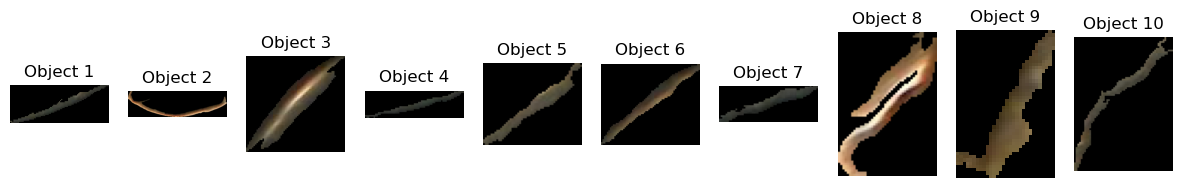

In [135]:
fig, axs = plt.subplots(1, len(cropped_objects[:10]), figsize = (15, 5))
for i, (cropped_obj, ax) in enumerate(zip(cropped_objects, axs)):
    ax.imshow(cv2.cvtColor(cropped_obj, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Object {i + 1}')
    ax.axis('off')
plt.show()